# CS4243 Lab 1: Template Matching

- The functions to be implemented are given in `lab1.py`, along with the instructions for each function. You need to fill in the codes which start with `###Your code here###` and end with `###`
- The test images are given in folder "inputs".
- Most of these functions are available in build-in libraries, but you are not allowed to use them in this assignment, only numpy is allowed except `numpy.pad()`.
- Apart from the pdf instructions, we provide a detailed instruction for each function in `lab1.py`. Please check these instructions if you find it difficult to implement the codes.

**Attention:**
- Please be careful about the data type of the image!
- Please use python with version >= 3.5.4, and install the libs provided in requirements.txt via `pip install -r requirements.txt`.
- Please do not change the structure of files in the whole folder of this assignment, otherwise TA may mark your code wrongly.
- Please do not change the input arguments of the functions in `lab1.py`, otherwise your implementation would fail to pass the test.
- Except for the input parameters of `non_maximum_suppression`, please do not change other codes in this notebook

1. **Image preprossessing** 15% (rgb2gray, gray2grad, pad_zeros)
2. **Normalized Cross Correlation** 30% (normalized_cross_correlation, normalized_cross_correlation_fast, normalized_cross_correlation_matrix)
3. **Non-maximum Suppression** 10% (non_max_supression) 
4. **Template Matching** 45% (normalized_cross_correlation_ms, 5 short answer questions)

## Part 1 Image preprossessing (15%)
+ rgb2gray: 5 points
+ gray2grad: 5 points
+ pad_zeros: 5 points

Relative error of gray2grad() (<1e-8 will be fine): 0.0


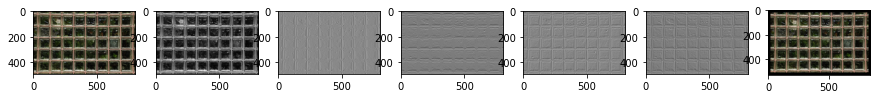

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'wallpaper.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))

# RGB image to grayscale image
img_gray = lab1.rgb2gray(img)
# Grayscale image to gradient image
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
# Padding
img_pad = lab1.pad_zeros(img, 20, 20, 20, 20)

lab1.show_imgs([img, img_gray, img_grad_h, img_grad_v, img_grad_d1, img_grad_d2, img_pad])

# For evaluation purpose
sobelh = np.array([[-1, 0, 1], 
                   [-2, 0, 2], 
                   [-1, 0, 1]], dtype = float)
img_grad_h_cv2 = cv2.filter2D(img_gray.astype(float), -1, cv2.flip(sobelh, -1), borderType=cv2.BORDER_CONSTANT)
print('Relative error of gray2grad() (<1e-8 will be fine):', np.linalg.norm(img_grad_h - img_grad_h_cv2))

## Part 2 Normalized Cross-Correlation (30%)

+ normalized_cross_correlation: 10 points
+ normalized_cross_correlation_fast: 10 points
+ normalized_cross_correlation_matrix: 10 points

Runtime of normalized_cross_correlation(): 5.196741s
Runtime of normalized_cross_correlation_fast(): 0.638993s
Runtime of normalized_cross_correlation_matrix(): 0.064842s
Relative error of normalized_cross_correlation() (<1e-4 will be fine): 6.962797169761942e-06
Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine): 6.962797169761942e-06
Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine): 6.962797169761942e-06


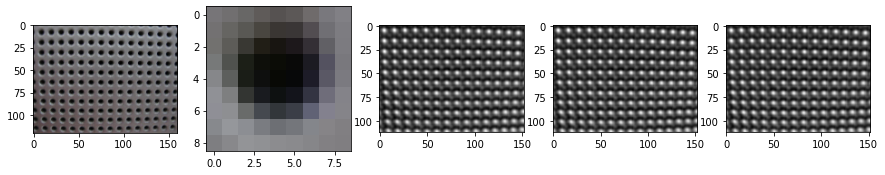

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
img = cv2.resize(img, (0, 0), fx=0.25, fy=0.25) # downsample the input image to save computation cost
template = img[5:14, 5:14]
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)

t1 = time.time()
response = lab1.normalized_cross_correlation(img, template)
t2 = time.time()
response_fast = lab1.normalized_cross_correlation_fast(img, template)
t3 = time.time()
response_matrix = lab1.normalized_cross_correlation_matrix(img, template)
t4 = time.time()

print('Runtime of normalized_cross_correlation(): %fs'%(t2-t1))
print('Runtime of normalized_cross_correlation_fast(): %fs'%(t3-t2))
print('Runtime of normalized_cross_correlation_matrix(): %fs'%(t4-t3))


lab1.show_imgs([img, template, response, response_fast, response_matrix])

# For evaluation purpose
response_cv2 = cv2.matchTemplate(img, template, cv2.TM_CCORR_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_fast() (<1e-4 will be fine):', np.linalg.norm(response_fast - response_cv2))
print('Relative error of normalized_cross_correlation_matrix() (<1e-4 will be fine):', np.linalg.norm(response_matrix - response_cv2))

## Part 3 Non-maximum Suppression (10%)

+ non_max_suppression: 10 points

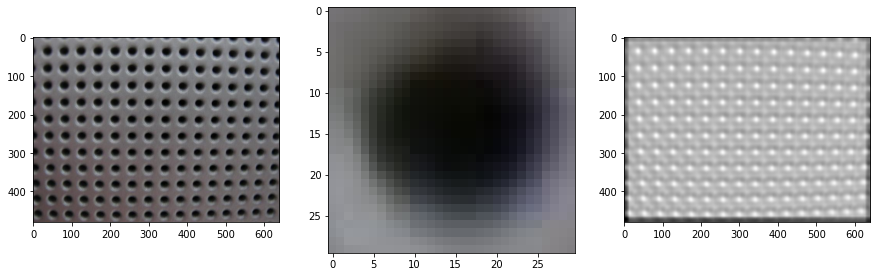

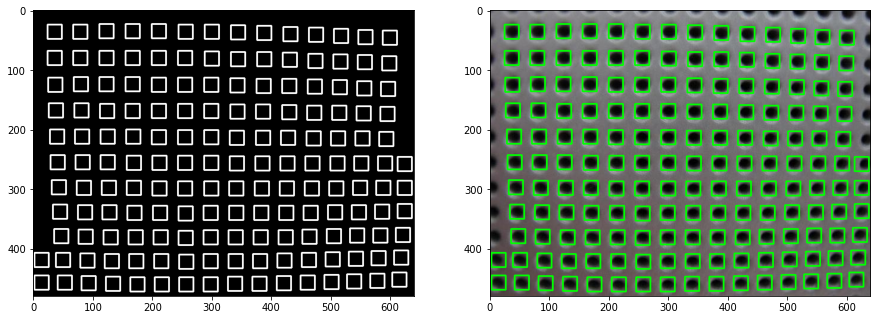

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:52, 22:52]
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

# perform template matching
response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.6), int(template.shape[1] * 0.6)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

## Part 4 Study on Template Matching (45%)

### 4.1 Image Inputs (5%)
No question in this part. You will get full marks if you achieve similar results.

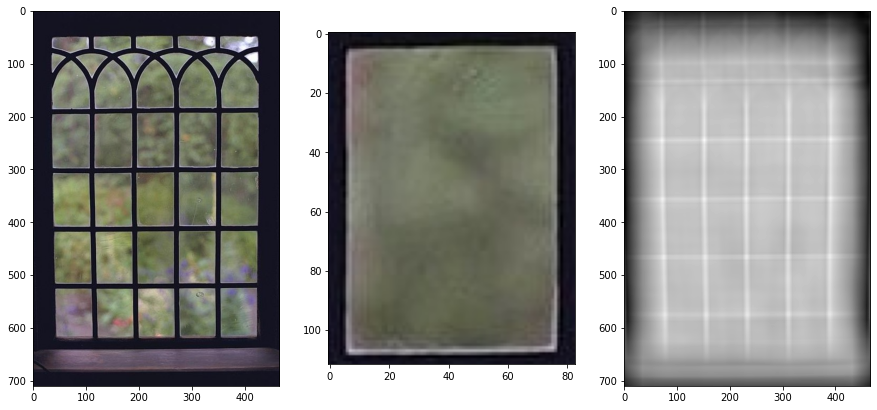

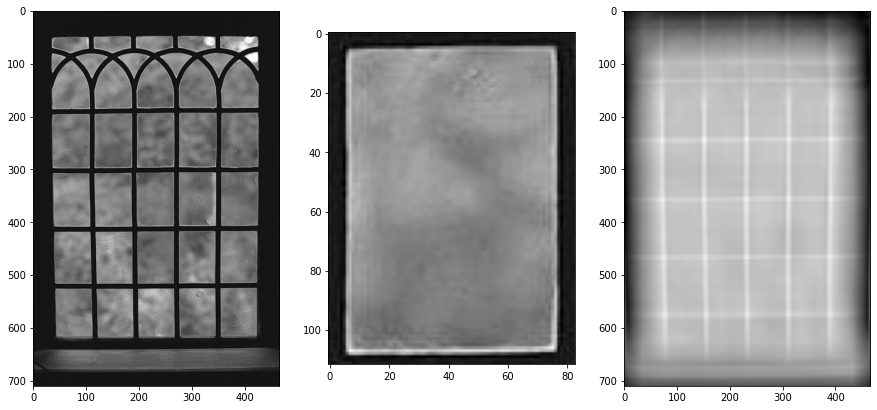

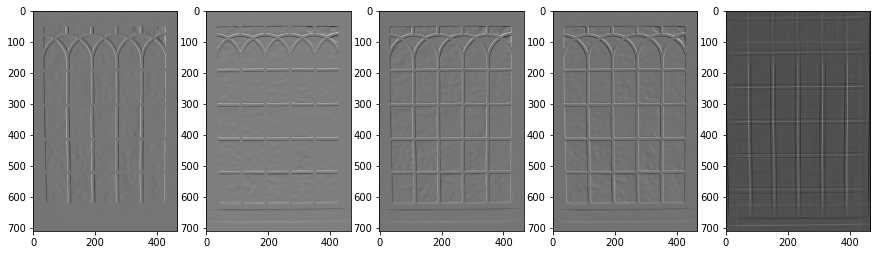

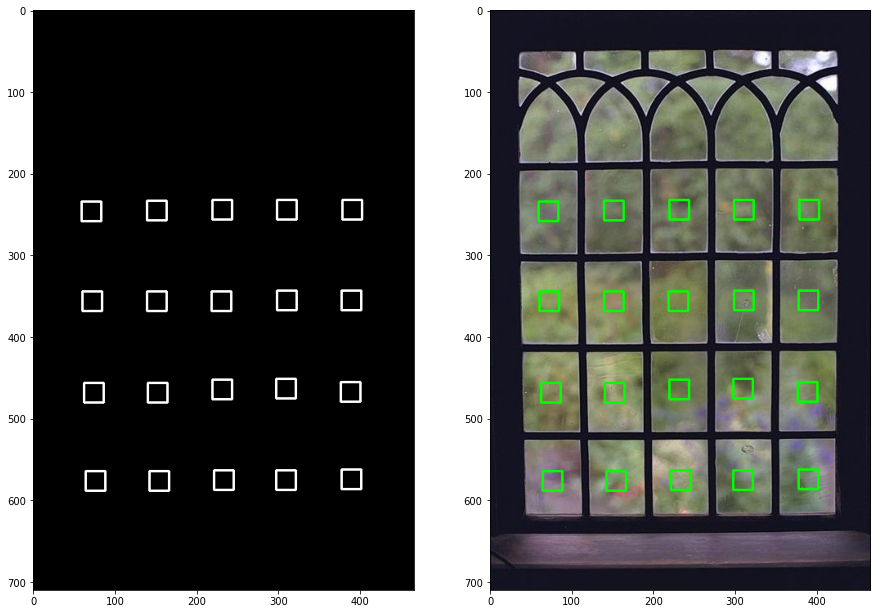

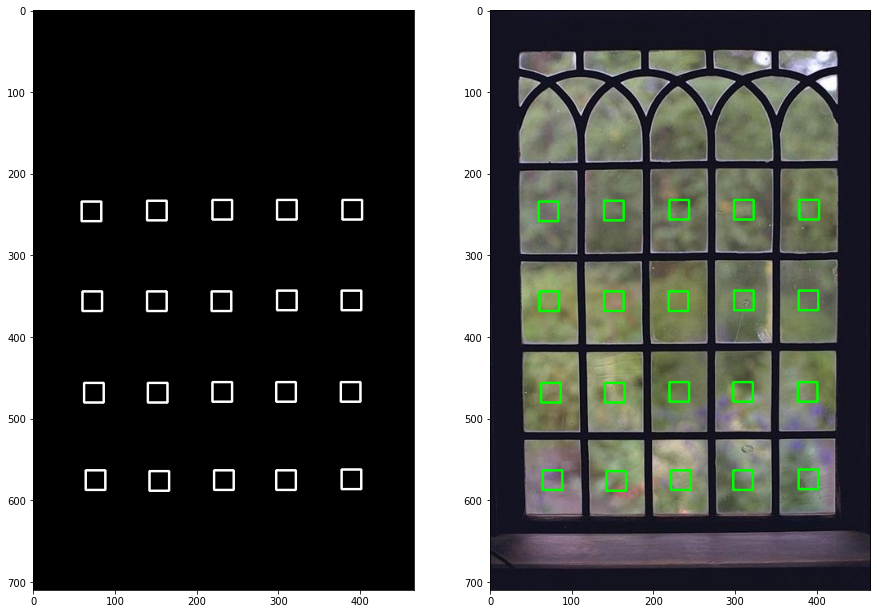

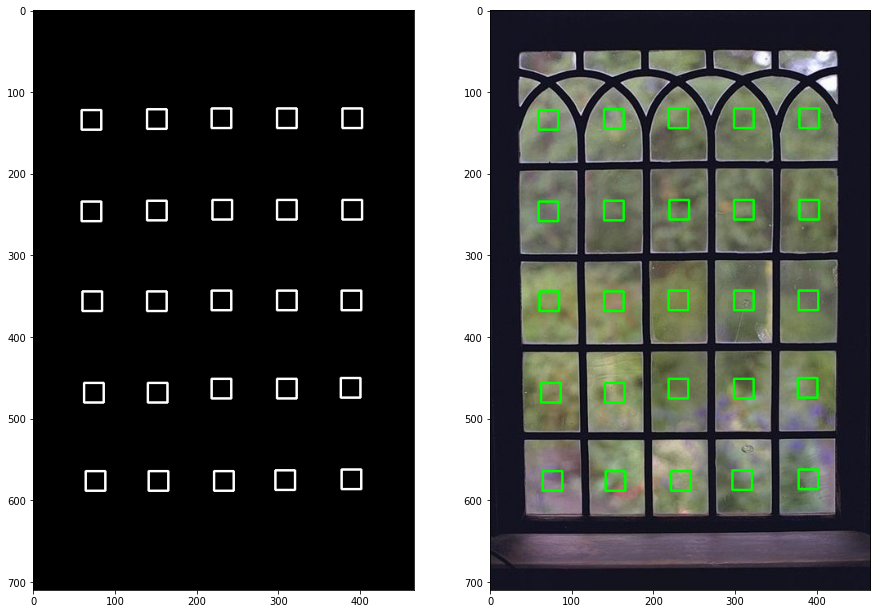

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import importlib
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'window.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[190:302, 110:193]

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = lab1.rgb2gray(template)

# RGB to grayscale
img_gray = lab1.rgb2gray(img)
template_gray = img_gray[190:302, 110:193]

# RGB to gradient map
img_grad_h, img_grad_v, img_grad_d1, img_grad_d2 = lab1.gray2grad(img_gray)
img_grad = np.stack([img_grad_h, img_grad_v, img_grad_d1, img_grad_d2], -1)
template_grad = img_grad[190:302, 110:193]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_gray_pad = lab1.pad_zeros(img_gray, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
img_grad_pad = lab1.pad_zeros(img_grad, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_gray = lab1.normalized_cross_correlation_fast(img_gray_pad, template_gray)
response_grad = lab1.normalized_cross_correlation_fast(img_grad_pad, template_grad)



lab1.show_imgs([img, template, response])
lab1.show_imgs([img_gray, template_gray, response_gray])
lab1.show_imgs([img_grad[:,:,0], img_grad[:,:,1], img_grad[:,:,2], img_grad[:,:,3], response_grad])

# !!! Adjust the suppress range or threshold if you fail to detect 4x5 repetitive patterns in the image for RGB and grayscale inputs
res = lab1.non_max_suppression(response, (int(template.shape[0] * 1), int(template.shape[1] * 1)), threshold=0.931)
lab1.show_img_with_squares(res, img_ori=img)

res_gray = lab1.non_max_suppression(response_gray, (int(template.shape[0] * 1), int(template.shape[1] * 1)), threshold=0.93)
lab1.show_img_with_squares(res_gray, img_ori=img)

res_grad = lab1.non_max_suppression(response_grad, (int(template.shape[0] * 1.25), int(template.shape[1] * 1.25)), threshold=0.25)
lab1.show_img_with_squares(res_grad, img_ori=img)

### 4.2 Template Inputs (6%)

+ Q&A: 6 points

Q: Explain why their response positions are different.

A: Cross correlation results in output pixel having high intensity if the template matches with the area covered. The different templates match different areas covered of the image resulting in different intensities for output response. On a side note, the general brightness of the area also plays a part if the cross-correlation does not rely on normalization.

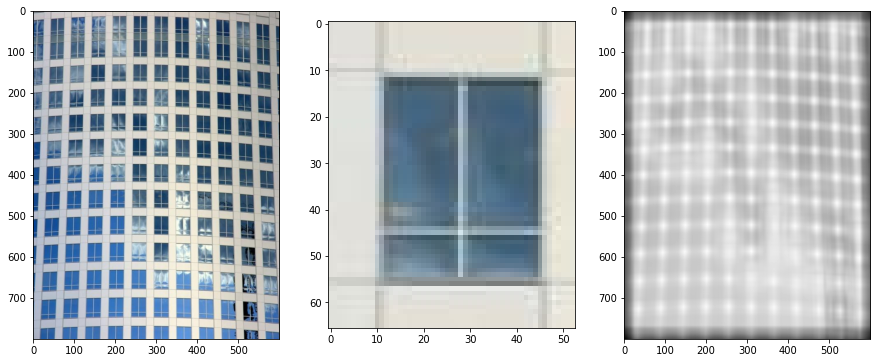

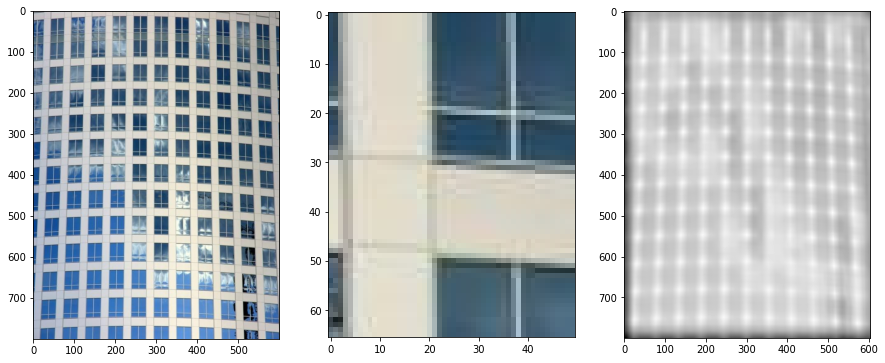

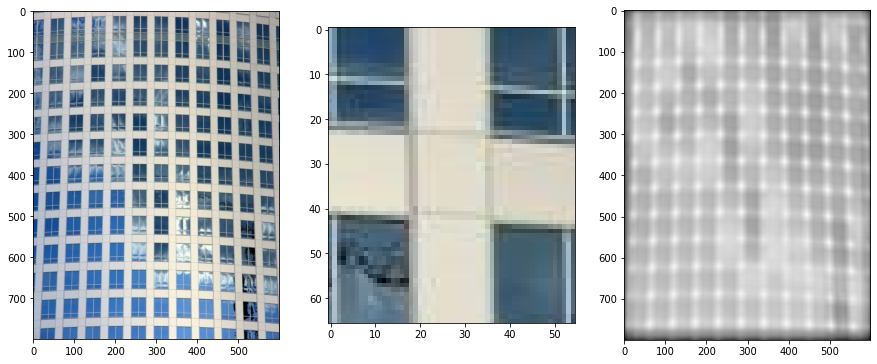

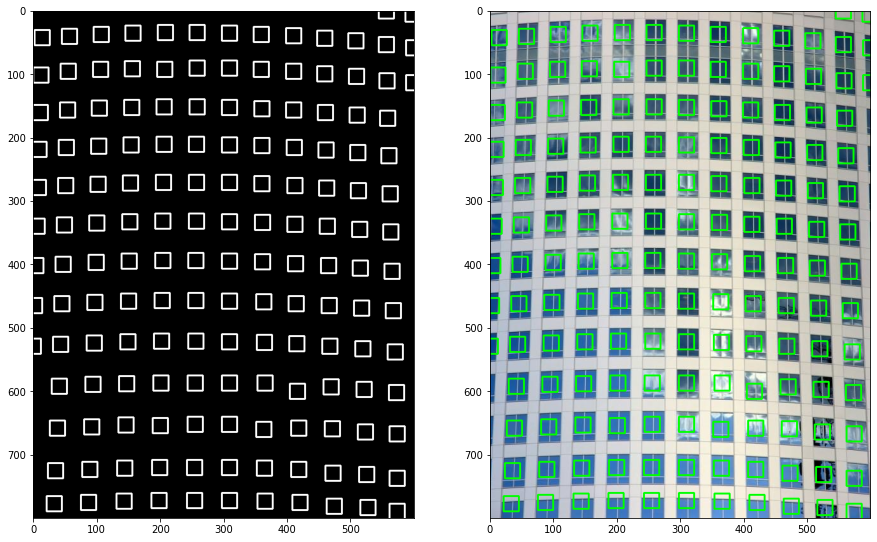

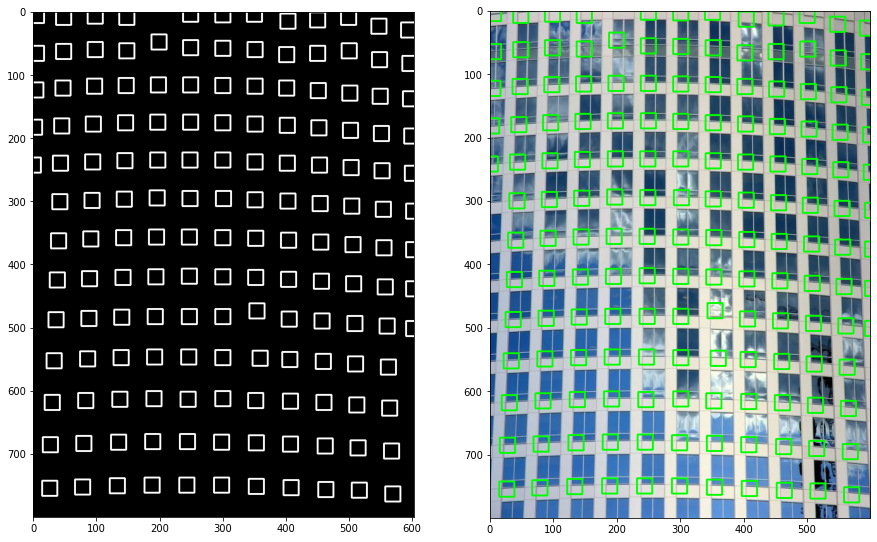

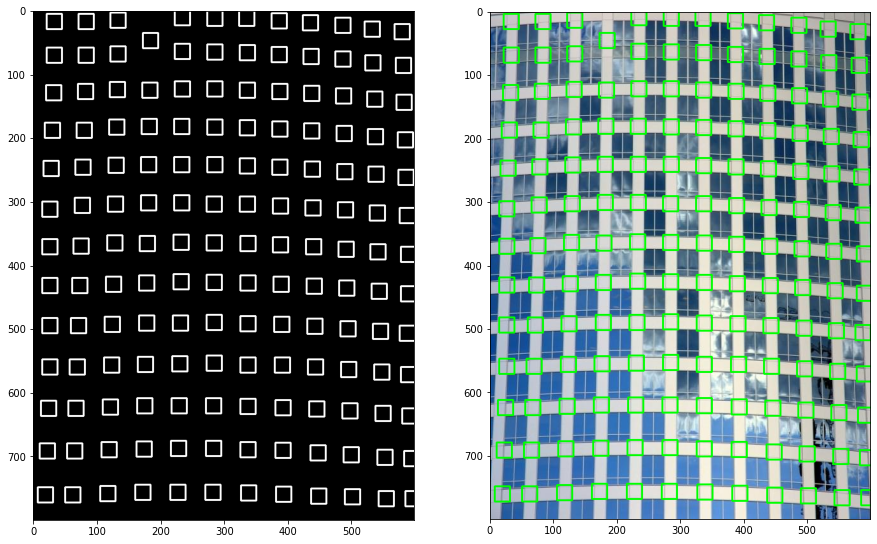

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import lab1
importlib.reload(lab1)


data_dir = 'inputs'
filename = 'building.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[425:491, 230:283]
template2 = img[394:460, 430:480]
template3 = img[400:466, 415:470]

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)


# perform match template
response = lab1.normalized_cross_correlation_fast(img_pad, template)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

lab1.show_imgs([img, template, response])
lab1.show_imgs([img, template2, response2])
lab1.show_imgs([img, template3, response3])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 1.6), int(template.shape[1] * 1.6)), threshold=0.5)
lab1.show_img_with_squares(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 1.6), int(template.shape[1] * 1.6)), threshold=0.5)
lab1.show_img_with_squares(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 1.6), int(template.shape[1] * 1.6)), threshold=0.5)
lab1.show_img_with_squares(res3, img_ori=img)

### 4.3 Template Size (6%）

+ Q&A: 6 points

Q1: How can each of these templates to detect every hole present in the input image? 

A1: Whenever the template overlaps with the original image and the image window perfectly matches the template, the output of that cross correlation is very high (essentially the squared value of the template). Thus afterwards when we perform non-max suppression we are able to isolate all the possible local-maxima's to identify all the holes.

Q2: Analyze and explain the subtle differences in the output borders.

A2: The 1x3 template is able to detect fewer holes as its is looking for 3 holes horizontally and the holes in the corners can only be a part of the pattern but not the center, thus it wasn't detected. The 3x1 template was able to detect some of the holes at the sides but faces a similar problem to the 1x3 except vertically - where it cannot detect the holes at the bottom as it is not at the center in a pattern of 3. Lastly the 3x3 hole pattern suffers from both the 1x3 and 3x1 's problems combined where it cannot detect the edges because the edge holes do not form a pattern of 3x3.

Q3: Describe the correlation output with templates with a 1x1.5 or a 1x2 array of holes.

A3: A 1x2 template of holes will result in the detection of maxima in between the holes for most of the holes if not all, as shown in the output cell below (although if there is isolated hole it would be able to detect it directly). A 1x1.5 template will detect maxima in between the holes but not directly in between, the maxima marker square would overlap part of the holes to its left. This is because the center of these templates causing the highest intensity are areas in between holes.

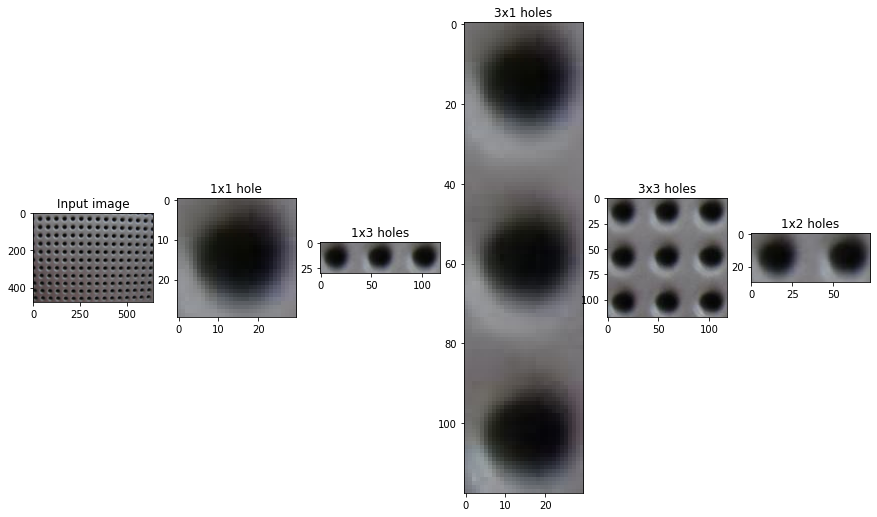

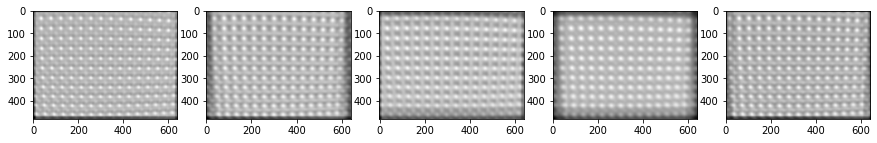

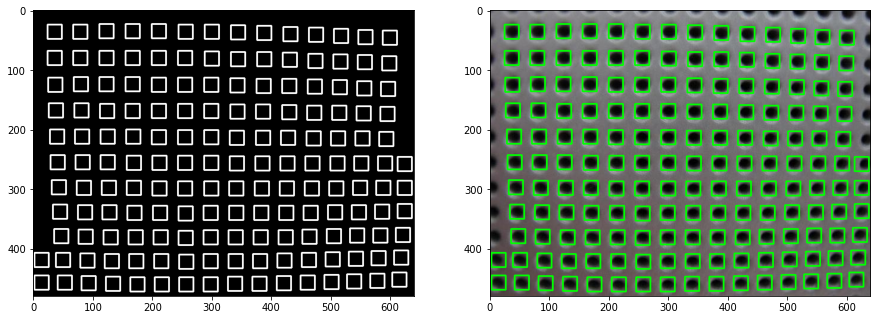

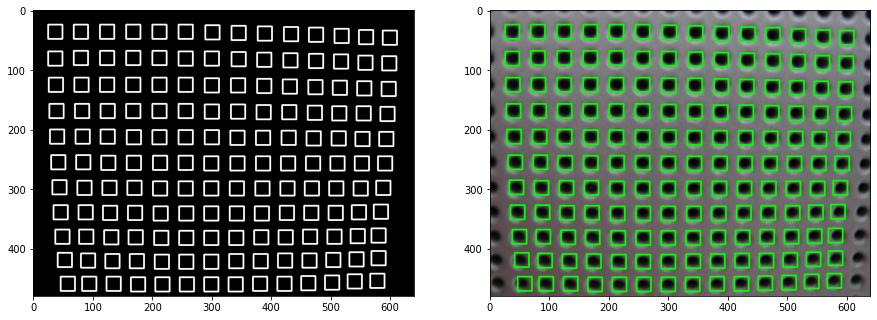

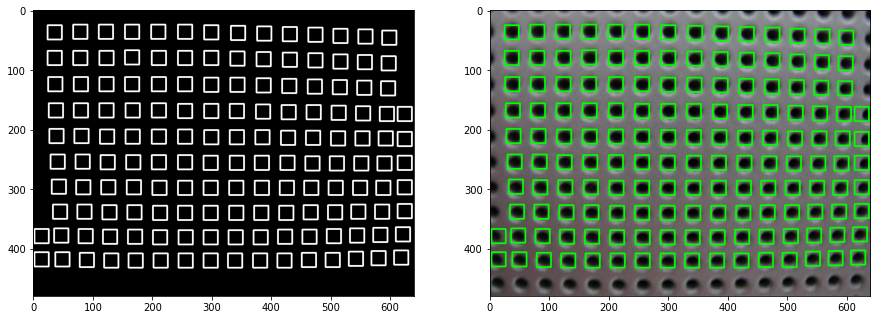

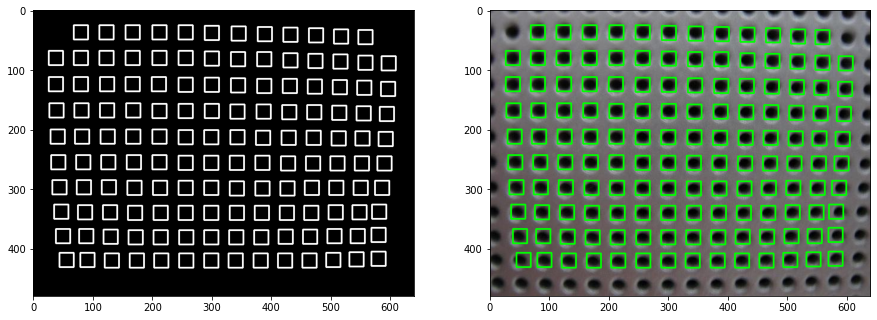

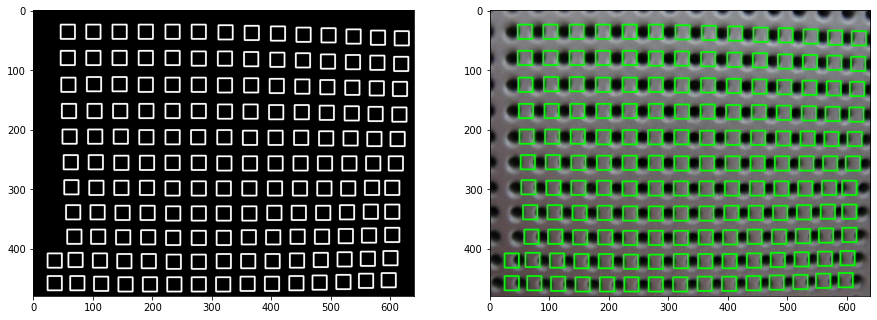

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import random
import lab1
importlib.reload(lab1)
random.seed(0)


data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:52, 22:52]
template2 = img[22:52, 22:140]
template3 = img[22:140, 22:52]
template4 = img[22:140, 22:140]
template5 = img[22:52, 22:95]


# Template 1x1
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response = lab1.normalized_cross_correlation_fast(img_pad, template)

# Template 1x3
pad_height_bef, pad_height_aft = template2.shape[0] // 2 - (1 if template2.shape[0] % 2 == 0 else 0), template2.shape[0] // 2
pad_width_bef, pad_width_aft = template2.shape[1] // 2 - (1 if template2.shape[1] % 2 == 0 else 0), template2.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response2 = lab1.normalized_cross_correlation_fast(img_pad, template2)

# Template 1x2
pad_height_bef, pad_height_aft = template5.shape[0] // 2 - (1 if template5.shape[0] % 2 == 0 else 0), template5.shape[0] // 2
pad_width_bef, pad_width_aft = template5.shape[1] // 2 - (1 if template5.shape[1] % 2 == 0 else 0), template5.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response5 = lab1.normalized_cross_correlation_fast(img_pad, template5)

# Template 3x1
pad_height_bef, pad_height_aft = template3.shape[0] // 2 - (1 if template3.shape[0] % 2 == 0 else 0), template3.shape[0] // 2
pad_width_bef, pad_width_aft = template3.shape[1] // 2 - (1 if template3.shape[1] % 2 == 0 else 0), template3.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response3 = lab1.normalized_cross_correlation_fast(img_pad, template3)

# Template 3x3
pad_height_bef, pad_height_aft = template4.shape[0] // 2 - (1 if template4.shape[0] % 2 == 0 else 0), template4.shape[0] // 2
pad_width_bef, pad_width_aft = template4.shape[1] // 2 - (1 if template4.shape[1] % 2 == 0 else 0), template4.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)
response4 = lab1.normalized_cross_correlation_fast(img_pad, template4)

lab1.show_imgs([img, template, template2, template3, template4, template5], titles=['Input image', '1x1 hole', '1x3 holes', '3x1 holes', '3x3 holes', '1x2 holes'])
lab1.show_imgs([response, response2, response3, response4, response5])

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)

res2 = lab1.non_max_suppression(response2, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res2, img_ori=img)

res3 = lab1.non_max_suppression(response3, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res3, img_ori=img)

res4 = lab1.non_max_suppression(response4, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res4, img_ori=img)

res5 = lab1.non_max_suppression(response5, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res5, img_ori=img)

### 4.4 Mean-subtracted cross correlation (16%)

+ normalized_cross_correlation_ms: 10 points
+ Q&A: 6 points

Q: What are the benefits of subtracting the mean?

A: It used to normalize the intensity due to exposure across the image, to ensure that only if the template exactly matches the window in the original image, will the result be highly positive. If it is a partial match it would result in a lot of subtractions as the values below the mean will be negative and when cross correlated if they do not match exactly with the template they will result in a smaller intensity.

Relative error of normalized_cross_correlation() (<1e-4 will be fine): 3.4256487932974974e-05
Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine): 0.0002063070902044262


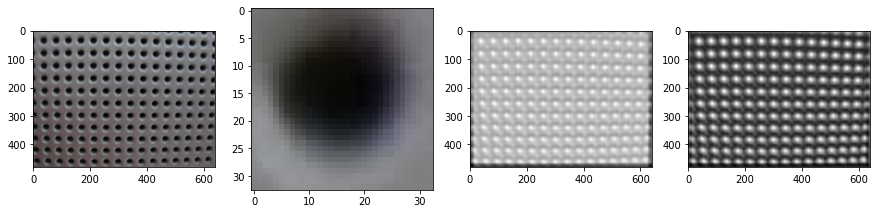

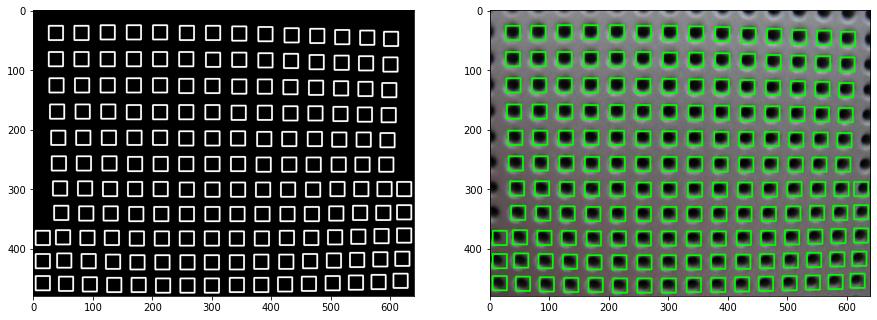

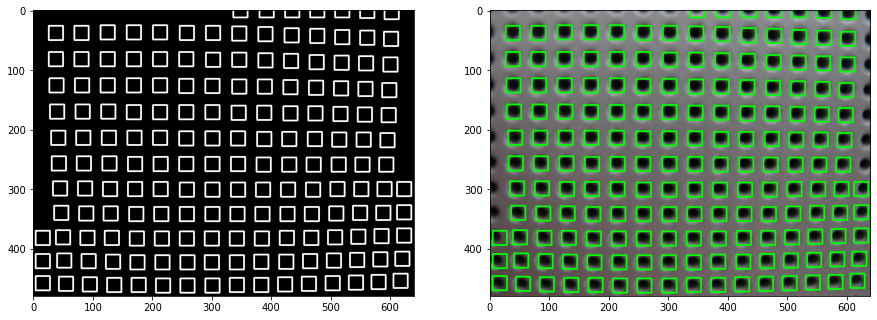

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[22:55, 22:55]
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)


# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)
response_ms = lab1.normalized_cross_correlation_ms(img_pad, template)

lab1.show_imgs([img, template, response, response_ms])

response_cv2 = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
response_cv2_ms = cv2.matchTemplate(img_pad, template, cv2.TM_CCOEFF_NORMED)
print('Relative error of normalized_cross_correlation() (<1e-4 will be fine):', np.linalg.norm(response - response_cv2))
print('Relative error of normalized_cross_correlation_ms() (<1e-3 will be fine):', np.linalg.norm(response_ms - response_cv2_ms))

res = lab1.non_max_suppression(response, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.9)
lab1.show_img_with_squares(res, img_ori=img)
res_ms = lab1.non_max_suppression(response_ms, (int(template.shape[0] * 0.8), int(template.shape[1] * 0.8)), threshold=0.5)
lab1.show_img_with_squares(res_ms, img_ori=img)

### 4.5 Auto-Correlation (6%)

+ Q&A: 6 points

Q: Explain why the correlation output responses decrease as one gets further away from the center of the output.

A: This is because the best match occurs when the template overlaps exactly with the image (here since the image is the template it will overlap at the center). Thus as we move away from the center the overlap is lower and thus the intensity after cross correlation is lower (since the window of the image multiplied to the kernel is no longer a perfect square).

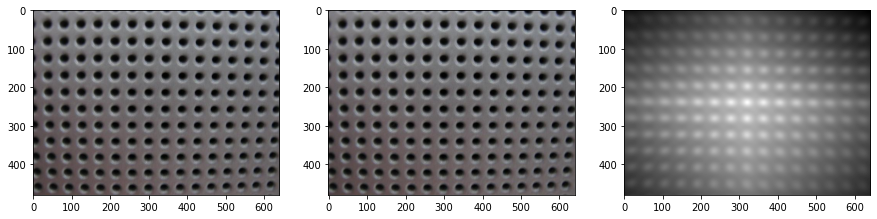

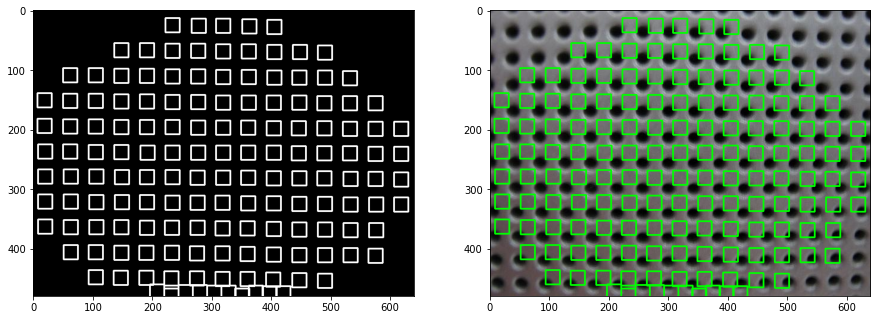

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'holes.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img.copy()

# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = cv2.matchTemplate(img_pad, template, cv2.TM_CCORR_NORMED)
lab1.show_imgs([img, template, response])

res = lab1.non_max_suppression(response, (26 * 1.8, 26 * 1.8), threshold=0.6)
lab1.show_img_with_squares(res, img_ori=img)

### 4.6 Limitations (6%)

+ Q&A: 6 points

Q: Observe the outputs and explain why template matching fails in certain regions of the image.

A: Certain regions in the image have different backgrounds with objects such as buildings, these lead to a lower intensity after cross correlation as the background does not match that of the template. Which is why template matching fails in some of the areas with darker backgrounds, as they have a lower intensity than the template's background and are not detected.

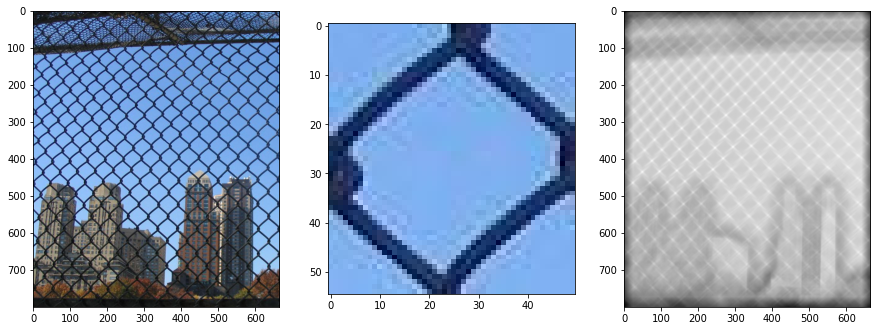

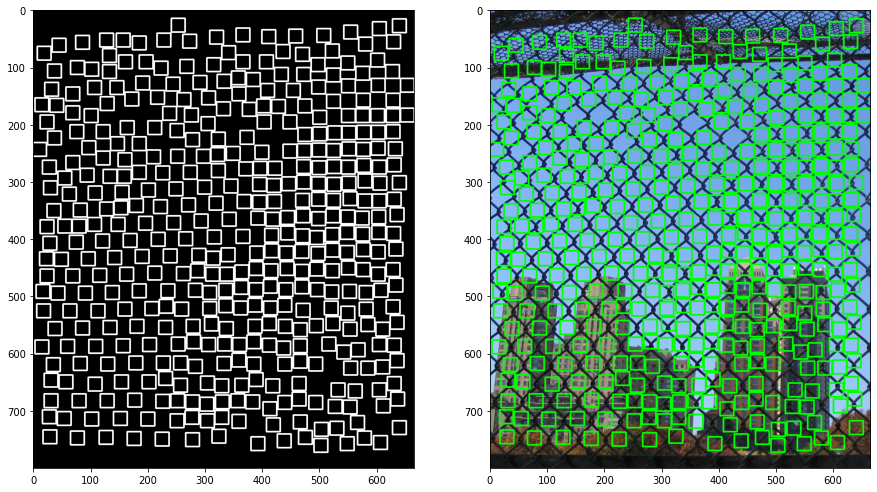

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import importlib
import numpy as np
import time
import cv2
import lab1
importlib.reload(lab1)

data_dir = 'inputs'
filename = 'fence.jpg'
img = lab1.read_img(os.path.join(data_dir, filename))
template = img[310:365, 295:345]
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
# pad zeros to the image
pad_height_bef, pad_height_aft = template.shape[0] // 2 - (1 if template.shape[0] % 2 == 0 else 0), template.shape[0] // 2
pad_width_bef, pad_width_aft = template.shape[1] // 2 - (1 if template.shape[1] % 2 == 0 else 0), template.shape[1] // 2
img_pad = lab1.pad_zeros(img, pad_height_bef, pad_height_aft, pad_width_bef, pad_width_aft)

response = lab1.normalized_cross_correlation_fast(img_pad, template)

lab1.show_imgs([img, template, response])


res = lab1.non_max_suppression(response, (int(template.shape[0] * 1), int(template.shape[1] * 1)), threshold=0.8)
lab1.show_img_with_squares(res, img_ori=img)


**Congrats! You have completed all tasks for lab 1.**